<a href="https://colab.research.google.com/github/kkimyunjoo/24-1-ESAA/blob/main/%EB%AF%B8%EB%8B%88_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_3_YB_3%EC%A1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **미니 프로젝트 3**
### **YB 3조(강민정, 김현주, 박지인, 이형주, 이희원)**

# 1. 데이터 및 라이브러리 로딩

In [ ]:
# 한글 글꼴 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,509 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and dire

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 라이브러리 설치
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# 데이터 로드
train = pd.read_csv('/content/drive/MyDrive/24-1 ESAA/영화 관객수/movies_train.csv')
test = pd.read_csv('/content/drive/MyDrive/24-1 ESAA/영화 관객수/movies_test.csv')
submission = pd.read_csv('/content/drive/MyDrive/24-1 ESAA/영화 관객수/submission.csv')

# 2. 데이터 탐색 및 전처리

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [ ]:
# dir_prev_bfnum 결측치 0으로 대체
train['dir_prev_bfnum'].fillna(0, inplace=True)
test['dir_prev_bfnum'].fillna(0, inplace=True)

In [ ]:
# 감독명 : 너무 다양해서 제거
train = train.drop(['director'],axis = 1)
test = test.drop(['director'],axis = 1)

In [ ]:
# 제목 : 의미가 없기 때문에 제거
train = train.drop(['title'],axis= 1)
test = test.drop(['title'],axis= 1)

In [ ]:
train.distributor.value_counts()

distributor
CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: count, Length: 169, dtype: int64

In [ ]:
# 상위 5개의 배급사를 제외하고 '기타'로처리
distributor_list = train.distributor.value_counts()[:5]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))

In [ ]:
# 개봉일을 바탕으로 년,월 변수 생성
train['년'] = train['release_time'].apply(lambda x: int(x[:4]))
train['월'] = train['release_time'].apply(lambda x: int(x[5:7]))
train =  train.drop(['release_time'],axis = 1)

test['년'] = test['release_time'].apply(lambda x: int(x[:4]))
test['월'] = test['release_time'].apply(lambda x: int(x[5:7]))
test =  test.drop(['release_time'],axis = 1)


In [ ]:
# 원핫 인코딩
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [ ]:
train_x = train.drop(['box_off_num'],axis= 1)
train_y = train['box_off_num']

# 3. 모델링

## **1) 선형 회귀**

### **LinearRegression**
#### 점수: 2112006.875

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()
lr.fit(train_x, train_y)
lr_pred = lr.predict(test)

submission = pd.read_csv('/content/drive/MyDrive/24-1 ESAA/영화 관객수/submission.csv')
submission['box_off_num'] =  lr_pred
submission.to_csv('linearreg.csv',index=False)

### **Ridge**
#### 점수: 2253121.923

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alphas = [0.05,0.1,1,5,8,9,10,12,15,20]

for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    # cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, train_x, train_y, scoring = "neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds의 평균 RMSE : {1:.4f} '.format(alpha,avg_rmse))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.04603e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.49759e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.85564e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.19958e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

alpha 0.05 일 때 5 folds의 평균 RMSE : 1479598.8122 
alpha 0.1 일 때 5 folds의 평균 RMSE : 1479358.6580 
alpha 1 일 때 5 folds의 평균 RMSE : 1475751.5128 
alpha 5 일 때 5 folds의 평균 RMSE : 1466520.2038 
alpha 8 일 때 5 folds의 평균 RMSE : 1462890.0452 
alpha 9 일 때 5 folds의 평균 RMSE : 1462018.2880 
alpha 10 일 때 5 folds의 평균 RMSE : 1461270.8420 
alpha 12 일 때 5 folds의 평균 RMSE : 1460077.0887 
alpha 15 일 때 5 folds의 평균 RMSE : 1458847.3364 
alpha 20 일 때 5 folds의 평균 RMSE : 1457757.7787 


In [ ]:
#alpha=20 일때 RMSE가 가장 작음
ridge = Ridge(alpha=20)
ridge.fit(train_x, train_y)
ridge_pred = ridge.predict(test)

submission = pd.read_csv('/content/drive/MyDrive/24-1 ESAA/영화 관객수/submission.csv')
submission['box_off_num'] =  ridge_pred
submission.to_csv('ridge.csv',index=False)

### Lasso
#### 점수: 2111990.388

In [ ]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 변환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
  coeff_df = pd.DataFrame()
  if verbose: print('####### ', model_name, '#######')
  for param in params:
    if model_name == 'Ridge': model = Ridge(alpha=param)
    elif model_name == 'Lasso': model = Lasso(alpha=param)
    elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
    neg_mse_scores = cross_val_score(model, X_data_n, y_target_n,
                                     scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))
    # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
    model.fit(train_x, train_y)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
    coeff = pd.Series(data=model.coef_, index=train_x.columns)
    colname = 'alpha:' + str(param)
    coeff_df[colname] = coeff
  return coeff_df

In [ ]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=train_x, y_target_n=train_y)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 1479845.342


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.138e+13, tolerance: 1.686e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.539e+13, tolerance: 1.776e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.299e+13, tolerance: 1.787e

alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 1479845.257
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 1479844.051


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.017e+13, tolerance: 2.002e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.138e+13, tolerance: 1.686e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.539e+13, tolerance: 1.776e

alpha 1일 때 5 폴드 세트의 평균 RMSE: 1479842.563
alpha 3일 때 5 폴드 세트의 평균 RMSE: 1479836.572


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.300e+13, tolerance: 1.787e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.017e+13, tolerance: 2.002e+11
  model = cd_fast.enet_coordinate_descent(


In [ ]:
lasso = Lasso(alpha=3)
lasso.fit(train_x, train_y)
lasso_pred = lasso.predict(test)

submission = pd.read_csv('/content/drive/MyDrive/24-1 ESAA/영화 관객수/submission.csv')
submission['box_off_num'] =  lasso_pred
submission.to_csv('lasso.csv',index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.017e+13, tolerance: 2.002e+11
  model = cd_fast.enet_coordinate_descent(


### **Elastic Net**
#### 점수: 2243583.968

In [ ]:
#l1_ratio=0.7 로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=train_x, y_target_n=train_y)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 1461215.825
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 1459049.926
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 1461457.712
alpha 1일 때 5 폴드 세트의 평균 RMSE: 1467770.877
alpha 3일 때 5 폴드 세트의 평균 RMSE: 1477524.028


In [ ]:
#alpha=0.1 일때 RMSE 값 가장 작음
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.7,random_state=42)
elastic_net.fit(train_x,train_y)
en_pred = elastic_net.predict(test)

submission = pd.read_csv('/content/drive/MyDrive/24-1 ESAA/영화 관객수/submission.csv')
submission['box_off_num'] = en_pred
submission.to_csv('elasticnet.csv',index=False)

## **2) LightGBM**
### 점수: 1169174.241

In [ ]:
# 데이터 로드
train = pd.read_csv('/content/drive/MyDrive/24-1 ESAA/영화 관객수/movies_train.csv')
test = pd.read_csv('/content/drive/MyDrive/24-1 ESAA/영화 관객수/movies_test.csv')

In [ ]:
# dir_prev_bfnum 결측치
train = train.fillna(0)
test = test.fillna(0)

# 감독명 : 너무 다양해서 제거
train = train.drop(['director'],axis = 1)
test = test.drop(['director'],axis = 1)

# 제목 : 의미가 없기 때문에 제거
train = train.drop(['title'],axis= 1)
test = test.drop(['title'],axis= 1)

# 상위 5개의 배급사를 제외하고 '기타'로처리
distributor_list = train.distributor.value_counts()[:5]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))

# 개봉일을 바탕으로 년,월 변수 생성
train['년'] = train['release_time'].apply(lambda x: int(x[:4]))
train['월'] = train['release_time'].apply(lambda x: int(x[5:7]))
train =  train.drop(['release_time'],axis = 1)

test['년'] = test['release_time'].apply(lambda x: int(x[:4]))
test['월'] = test['release_time'].apply(lambda x: int(x[5:7]))
test =  test.drop(['release_time'],axis = 1)

# 장르별 평균 관객수
gen_mean = train.groupby('genre')['box_off_num'].mean().sort_values(ascending=False)

# 라벨 인코딩
genre_mapping = {}

for i in range(len(gen_mean.index)):
  genre_mapping[gen_mean.index[i]] = i

train['genre'] = train['genre'].map(genre_mapping)
test['genre'] = test['genre'].map(genre_mapping)

# 원핫 인코딩
train = pd.get_dummies(train)
test = pd.get_dummies(test)

train_x = train.drop(['box_off_num'],axis= 1)
train_y = train['box_off_num']

In [ ]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(n_estimators=300, verbose=-1)
lgbm.fit(train_x, train_y)
lgbm_pred = lgbm.predict(test)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49660 (\N{HANGUL SYLLABLE SYO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50868 (\N{HANGUL SYLLABLE UN}) missing from current font.
  func(*args,

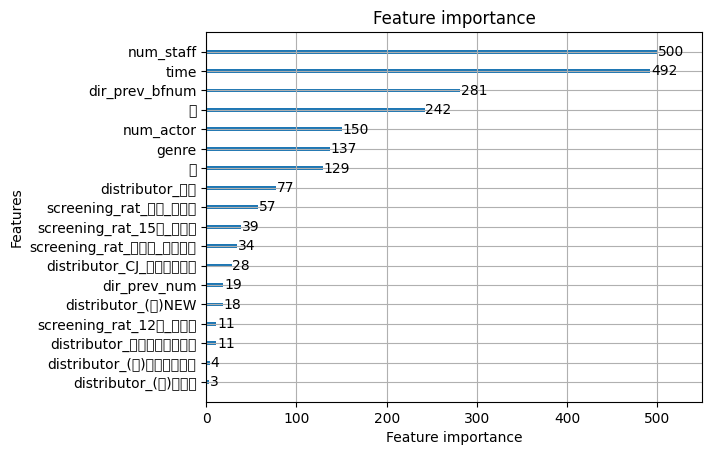

In [ ]:
from lightgbm import plot_importance
plot_importance(lgbm)

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/24-1 ESAA/영화 관객수/submission.csv')
submission['box_off_num'] =  lgbm_pred
submission.to_csv('lightgbm1.csv',index=False)

### 하이퍼 파라미터 튜닝한 모델
점수: 1409990.214

In [ ]:
# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()

params = {'learning_rate': [0.01, 0.08, 0.12],
    'max_depth': [3, 4, 5],
    'num_leaves': [31, 63, 127],
    'min_child_samples': [20, 50, 100],
    'min_child_weight':[60, 100],
    'subsample': [0.8, 0.9, 1.0]}

gridcv = GridSearchCV(lgbm,param_grid=params,cv=5,n_jobs=-1,scoring='neg_mean_squared_error')
gridcv.fit(train_x, train_y)
print('GridSearch 최적 파라미터', gridcv.best_params_)

In [ ]:
lgbm = LGBMRegressor(learning_rate=0.08,
                             max_depth=5,
                             min_child_sample=20,
                             min_child_weight=60,
                             num_leaves=31,
                             subsample=0.8)

lgbm.fit(train_x, train_y)
lgbm_pred_2 = lgbm.predict(test)

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/24-1 ESAA/영화 관객수/submission.csv')
submission['box_off_num'] =  lgbm_pred_2
submission.to_csv('lightgbm2.csv',index=False)

## **3) XGBoost**
### 점수: 1180214.479

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(train_x, train_y)
xgb_pred = xgb.predict(test)

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/24-1 ESAA/영화 관객수/submission.csv')
submission['box_off_num'] = np.abs(xgb_pred)
submission.to_csv('xgboost1.csv',index = False)

### 하이퍼 파라미터 튜닝한 모델
점수: 1284302.312

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=156)
params = {'learning_rate': [0.01, 0.1, 0.2],
          'min_child_weight':[0.3,0.5,0.7],
          'colsample_bytree': [0.8, 0.9, 1.0],
          'max_depth':[3,4,5],
          'subsample':[0.5,0.6,0.7],
          'n_estimators':[100,300]
}

gridcv = GridSearchCV(xgb, param_grid=params, cv=3)
gridcv.fit(train_x, train_y)

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

In [ ]:
xgb_model = XGBRegressor(colsample_bytree= 0.8, learning_rate=0.01, max_depth=3, min_child_weight=0.3, n_estimators=300, subsample=0.5)
xgb_model.fit(train_x, train_y)
xgb_pred_2 = xgb_model.predict(test)

submission = pd.read_csv('/content/drive/MyDrive/24-1 ESAA/영화 관객수/submission.csv')
submission['box_off_num'] = xgb_pred_2
submission.to_csv('xgboost2.csv',index=False)

## **4) RandomForest**
### 점수: 1294471.297

[데이터 전처리]

In [ ]:
# dir_prev_bfnum 결측치는 dir_prev_bfnum = 0일 때 발생하므로 결측치를 0으로 대체
train['dir_prev_bfnum'].fillna(0, inplace=True)
test['dir_prev_bfnum'].fillna(0, inplace=True)

# 600개 데이터 중 472개의 distinct한 감독명 존재 -> 과적합의 우려 있으므로 director 피처 제거
import numpy as np
unique_count = len(np.unique(train['director']))
print(unique_count)

train = train.drop(['director'], axis=1)
test = test.drop(['director'], axis=1)

# 회귀분석에서 유의미한 영향을 미치기 어려우므로 title 피처 제거
train = train.drop(['title'],axis= 1)
test = test.drop(['title'],axis= 1)

# release_time으로 년, 월 변수 생성
train['년'] = train['release_time'].apply(lambda x: int(x[:4]))
train['월'] = train['release_time'].apply(lambda x: int(x[5:7]))
train =  train.drop(['release_time'],axis = 1)

test['년'] = test['release_time'].apply(lambda x: int(x[:4]))
test['월'] = test['release_time'].apply(lambda x: int(x[5:7]))
test =  test.drop(['release_time'],axis = 1)

# 169개의 unique한 distributor => 상위 5개의 배급사를 제외하고 '기타'로처리

distributor_list = train.distributor.value_counts()[:5]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))

# OneHotEncoding: distributor, genre, screening_rat
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

train = pd.get_dummies(train, columns=['distributor'], drop_first=True)
test = pd.get_dummies(test, columns=['distributor'], drop_first=True)

train = pd.get_dummies(train, columns=['genre'], drop_first=True)
test = pd.get_dummies(test, columns=['genre'], drop_first=True)

train = pd.get_dummies(train, columns=['screening_rat'], drop_first=True)
test = pd.get_dummies(test, columns=['screening_rat'], drop_first=True)

# train_y, train_x 생성
train_y = train['box_off_num']
train_x = train.drop(['box_off_num'],axis= 1)

472


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

params = {'n_estimators': [50, 100, 200],
          'max_depth': [None, 10, 20, 30],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4]}

gridcv = GridSearchCV(rf, param_grid=params, cv=5)
gridcv.fit(train_x, train_y)

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

GridSearchCV 최적 파라미터: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
rf = RandomForestRegressor(max_depth=10,
                           min_samples_leaf=4,
                           min_samples_split=10,
                           n_estimators=100)

rf.fit(train_x, train_y)
rf_pred = rf.predict(test)

submission = pd.read_csv('/content/drive/MyDrive/24-1 ESAA/영화 관객수/submission.csv')
submission['box_off_num'] = rf_pred
submission.to_csv('randomforest.csv',index=False)

## **5) GradientBoosting**
### 점수: 1201505.667

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/ESAA_dataset/movies/movies_train.csv')
test = pd.read_csv('/content/drive/MyDrive/ESAA_dataset/movies/movies_test.csv')

# dir_prev_bfnum 중앙값 대체
bfnum_median = np.nanmedian(train.dir_prev_bfnum)
train = train.fillna(bfnum_median)
test = test.fillna(bfnum_median)

# 감독명 : 너무 다양해서 제거
train = train.drop(['director'],axis = 1)
test = test.drop(['director'],axis = 1)

# 제목 : 의미가 없기 때문에 제거
train = train.drop(['title'],axis= 1)
test = test.drop(['title'],axis= 1)

# 대형 배급사/기타로 분류
CJ = ['CGV아트하우스', 'CJ E&M Pictures', 'CJ E&M 영화부문', 'CJ 엔터테인먼트']
Lotte = ['롯데엔터테인먼트']
New = ['(주)NEW', 'NEW']
Box = ['(주)쇼박스', '쇼박스(주)미디어플렉스']
Mountain = ['(주)마운틴픽쳐스','마운틴 픽처스','더픽쳐스/(주)마운틴픽쳐스' ]

def dis_category(dis):
  cat = ''
  if dis in CJ: cat = 'CJ'
  elif dis in Lotte: cat = '롯데'
  elif dis in New: cat = 'NEW'
  elif dis in Box: cat = '쇼박스'
  elif dis in Mountain: cat = '마운틴픽쳐스'
  else: cat='기타'
  return cat

train['distributor'] = train['distributor'].apply(lambda x : dis_category(x))
test['distributor'] = test['distributor'].apply(lambda x : dis_category(x))

# 장르 평균 관객수에 따른 라벨 인코딩
gen_mean = train.groupby('genre')['box_off_num'].mean().sort_values(ascending=False)

genre_mapping = {}

for i in range(len(gen_mean.index)):
  genre_mapping[gen_mean.index[i]] = i

train['genre'] = train['genre'].map(genre_mapping)
test['genre'] = test['genre'].map(genre_mapping)

# 개봉일을 바탕으로 년,월 변수 생성
train['year'] = train['release_time'].apply(lambda x: int(x[:4]))
train['month'] = train['release_time'].apply(lambda x: int(x[5:7]))
train =  train.drop(['release_time'],axis = 1)

test['year'] = test['release_time'].apply(lambda x: int(x[:4]))
test['month'] = test['release_time'].apply(lambda x: int(x[5:7]))
test =  test.drop(['release_time'],axis = 1)

# 계절 변수 추가
def season_func(df_month):
  df_season = ''
  if df_month in [3,4,5]: df_season = 0 # spring == 0
  elif df_month in [6,7,8]: df_season = 1 # summer == 1
  elif df_month in [9,10,11]: df_season = 2 # fall == 2
  elif df_month in [12,1,2]: df_season = 3 # winter == 3
  return df_season

train['season'] = train['month'].apply(lambda x : season_func(x))
test['season'] = test['month'].apply(lambda x : season_func(x))

# 원핫 인코딩
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor()
gbm.fit(train_x, train_y)
gbm_pred = gbm.predict(test)

Text(0.5, 1.0, 'GBM Feature Importance')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53328 (\N{HANGUL SYLLABLE KYU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47704 (\N{HANGUL SYLLABLE MEN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*arg

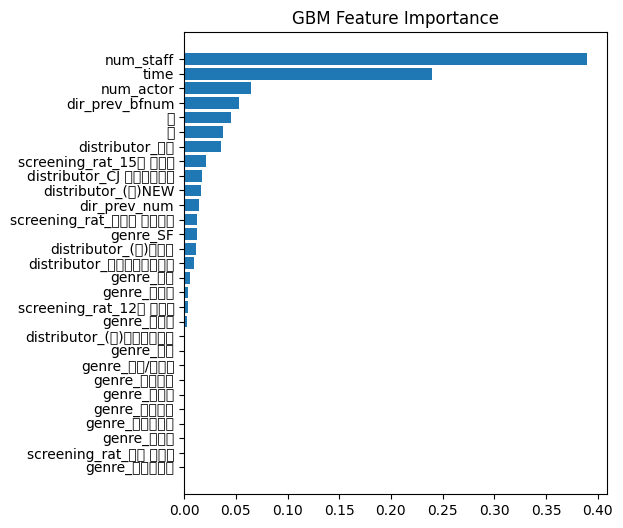

In [ ]:
feature_importance = gbm.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(train_x.columns)[sorted_idx])
plt.title("GBM Feature Importance")

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/24-1 ESAA/영화 관객수/submission.csv')
submission['box_off_num'] = gbm_pred
submission.to_csv('gradientboosting.csv',index=False)

## **6) 모델 혼합**

### **Voting**

#### 점수: 1214705.142
: RandomForest, XGBoost, LightGBM 모델을 보팅시켰다.

In [ ]:
from sklearn.ensemble import VotingRegressor

vt2 = VotingRegressor(estimators = [('rf', rf4), ('xgb', xgb9), ('lgb', lgbm3)])
vt2.fit(train_x, train_y)
pred = vt2.predict(test)

In [ ]:
submission = pd.read_csv('submission.csv')
submission['box_off_num'] = np.abs(pred)

submission.to_csv('vt2.csv',index = False)

### **가중치 조절**

#### 점수: 1123241.393

: xgb, lgbm, gbm 모델 중 가장 점수가 가장 잘 나온 모델인 lgb 에게 더 높은 가중치를 부여하여 pred 값을 혼합하였다.

In [ ]:
xgb_pred[xgb_pred<0] = 0
lgb_pred[lgb_pred<0] = 0
gbm_pred[gbm_pred<0] = 0

In [ ]:
pred_mix = 0.35*xgb_pred + 0.20*gbm_pred + 0.45*lgb_pred

sub_mix2 = submission.copy()
sub_mix2['box_off_num'] = pred_mix
sub_mix2.to_csv('label_mix.csv', index=False)